In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [2]:
base_dir="/root/vllm/benchmarks/result"

# E2E result

In [3]:
date = "20240706"
counters = [96]
dir_names= [os.path.join(base_dir, date, str(counter)) for counter in counters]

In [4]:
dfs = {}
for dir_name in dir_names:
    for file in os.listdir(dir_name):
        if file.endswith(".json"):

            with open(os.path.join(dir_name, file), "r") as f:
                data = json.load(f)
            df = pd.DataFrame(data)
            df.drop(columns=['date','backend','tokenizer_id','best_of','use_beam_search'], inplace=True)
            df.replace({"fcfs": "FCFS", "infer":"Infer","full":"Full","half":"Half"},inplace=True)
            dfs[file]= df
            

In [11]:
df.columns

Index(['model_id', 'num_prompts', 'swap_space', 'preemption_mode',
       'scheduler_policy', 'gpu_memory_utilization', 'max_num_seqs',
       'max_tokens', 'swap_policy', 'iter_theshold', 'swap_out_partial_rate',
       'request_rate', 'duration', 'completed', 'total_input_tokens',
       'total_output_tokens', 'request_throughput', 'input_throughput',
       'output_throughput', 'mean_ttft_ms', 'median_ttft_ms', 'p99_ttft_ms',
       'mean_tpot_ms', 'median_tpot_ms', 'p99_tpot_ms', 'mean_itl_ms',
       'median_itl_ms', 'p99_itl_ms', 'mean_lat_ms', 'median_lat_ms',
       'p99_lat_ms', 'input_lens', 'output_lens', 'ttfts', 'itls',
       'latencies'],
      dtype='object')

(0.0, 2.1)

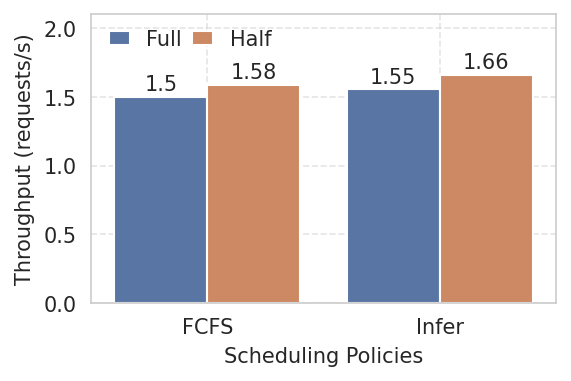

In [136]:
# plot the average throughput with different scheduling policies and swap policies
result = {"scheduling_policies": [], "swap_policies": [], "throughput": []}
for df_name in dfs:
    tmp_df = dfs[df_name]
    result["scheduling_policies"].append(tmp_df["scheduler_policy"].iloc[0])
    result["swap_policies"].append(tmp_df["swap_policy"].iloc[0])
    result["throughput"].append(tmp_df["request_throughput"].mean())
result_df = pd.DataFrame(result)
result_df = result_df.groupby(["scheduling_policies", "swap_policies"]).mean().reset_index()
sns.set_style(style="whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(4, 2.5), dpi=150)
ax = sns.barplot(
    x="scheduling_policies", y="throughput", hue="swap_policies", data=result_df
)
# add the number of each bar in ax
for p in ax.patches:
    if p.get_height() == 0:
        continue
    ax.annotate(
        str(round(p.get_height(), 2)),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 6),
        textcoords="offset points",
    )

plt.xlabel("Scheduling Policies")
plt.ylabel("Throughput (requests/s)")
plt.legend(loc=(0.02,0.85), frameon=False, ncol=2, handlelength=1.0, columnspacing=0.5)
plt.grid(linestyle="--", alpha=0.5)
plt.ylim(0, 2.1)

(0.0, 800.0)

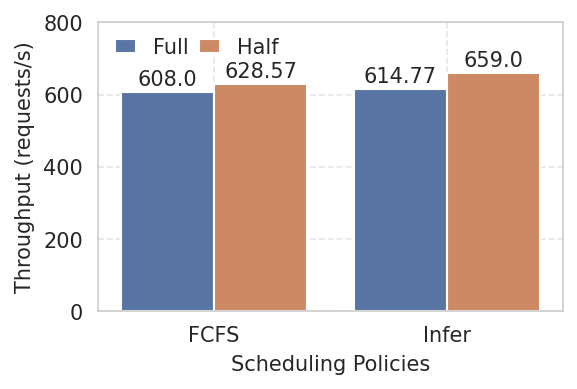

In [13]:
# plot the average throughput with different scheduling policies and swap policies
result = {"scheduling_policies": [], "swap_policies": [], "throughput": []}
for df_name in dfs:
    tmp_df = dfs[df_name]
    result["scheduling_policies"].append(tmp_df["scheduler_policy"].iloc[0])
    result["swap_policies"].append(tmp_df["swap_policy"].iloc[0])
    result["throughput"].append(tmp_df["output_throughput"].mean())
result_df = pd.DataFrame(result)
result_df = result_df.groupby(["scheduling_policies", "swap_policies"]).mean().reset_index()
sns.set_style(style="whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(4, 2.5), dpi=150)
ax = sns.barplot(
    x="scheduling_policies", y="throughput", hue="swap_policies", data=result_df
)
# add the number of each bar in ax
for p in ax.patches:
    if p.get_height() == 0:
        continue
    ax.annotate(
        str(round(p.get_height(), 2)),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 6),
        textcoords="offset points",
    )

plt.xlabel("Scheduling Policies")
plt.ylabel("Throughput (requests/s)")
plt.legend(loc=(0.02,0.85), frameon=False, ncol=2, handlelength=1.0, columnspacing=0.5)
plt.grid(linestyle="--", alpha=0.5)
plt.ylim(0, 800)

In [137]:
columns = dfs[next(iter(dfs))].columns.tolist()

In [138]:
dfs[next(iter(dfs))].columns

Index(['model_id', 'num_prompts', 'swap_space', 'preemption_mode',
       'scheduler_policy', 'gpu_memory_utilization', 'max_num_seqs',
       'max_tokens', 'swap_policy', 'iter_theshold', 'swap_out_partial_rate',
       'request_rate', 'duration', 'completed', 'total_input_tokens',
       'total_output_tokens', 'request_throughput', 'input_throughput',
       'output_throughput', 'mean_ttft_ms', 'median_ttft_ms', 'p99_ttft_ms',
       'mean_tpot_ms', 'median_tpot_ms', 'p99_tpot_ms', 'mean_itl_ms',
       'median_itl_ms', 'p99_itl_ms', 'mean_lat_ms', 'median_lat_ms',
       'p99_lat_ms', 'input_lens', 'output_lens', 'ttfts', 'itls',
       'latencies'],
      dtype='object')

In [139]:
# Initialize result dictionary
result = {"scheduler_policy": [], "swap_policy": []}
selected_columns = ['mean_ttft_ms', 'median_ttft_ms', 'p99_ttft_ms', 'mean_tpot_ms',
                    'median_tpot_ms', 'p99_tpot_ms', 'mean_itl_ms', 'median_itl_ms',
                    'p99_itl_ms',"mean_lat_ms", "median_lat_ms", "p99_lat_ms"]

for column in selected_columns:
    result[column] = []

# Populate result dictionary with data
for df_name in dfs:
    df = dfs[df_name]
    for column in result.keys():
        if column in df.columns:
            if isinstance(df[column][0], float):
                result[column].append(df[column].mean())
            else:
                result[column].append(df[column][0])

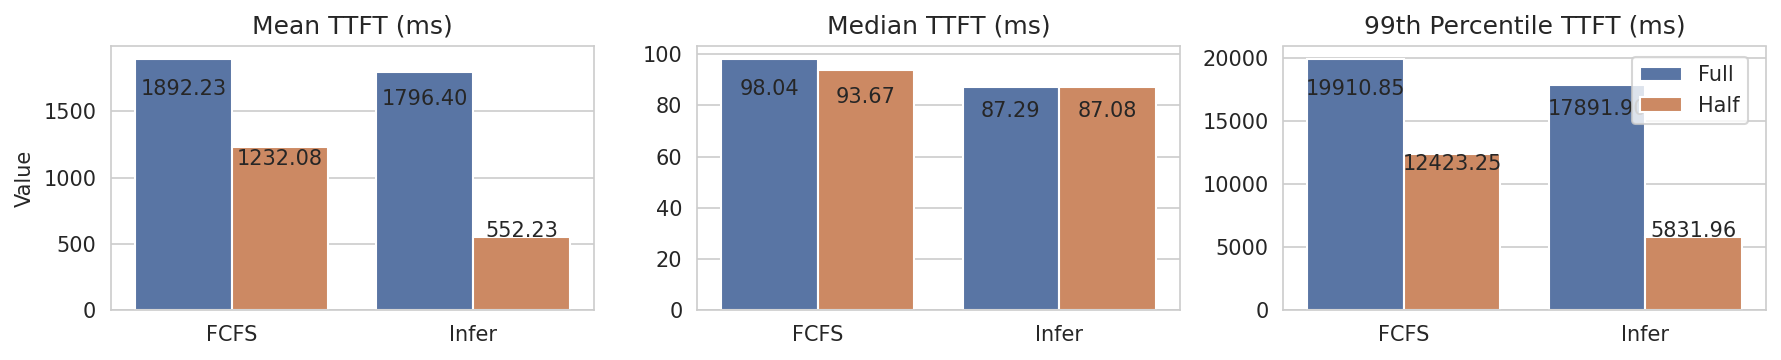

In [140]:

# Convert result dictionary to DataFrame
result_df = pd.DataFrame(result)
result_df = result_df.groupby(['scheduler_policy','swap_policy']).mean().reset_index()
# Select ttft-related metrics
ttft_columns = ['mean_ttft_ms', 'median_ttft_ms', 'p99_ttft_ms']
lat_df = result_df[['scheduler_policy', 'swap_policy'] + ttft_columns]


# Create the DataFrame to long format
tpot_long_df = lat_df.melt(id_vars=['scheduler_policy', 'swap_policy'], 
                            value_vars=ttft_columns, 
                            var_name='Metric', 
                            value_name='Value')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 2.5), dpi=150, nrows=1, ncols=3)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] =='mean_ttft_ms'], ax=ax[0],legend=False)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] =='median_ttft_ms'], ax=ax[1],legend=False)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] == 'p99_ttft_ms'], ax=ax[2])

for i in range(3):
    for p in ax[i].patches:
        if p.get_height() == 0:
            continue
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()*.8), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax[0].set_title('Mean TTFT (ms)')
ax[1].set_title('Median TTFT (ms)')
ax[2].set_title('99th Percentile TTFT (ms)')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

ax[0].set_ylabel('Value')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.legend(bbox_to_anchor=(.7, 1), loc='upper left')
plt.tight_layout()
plt.show()


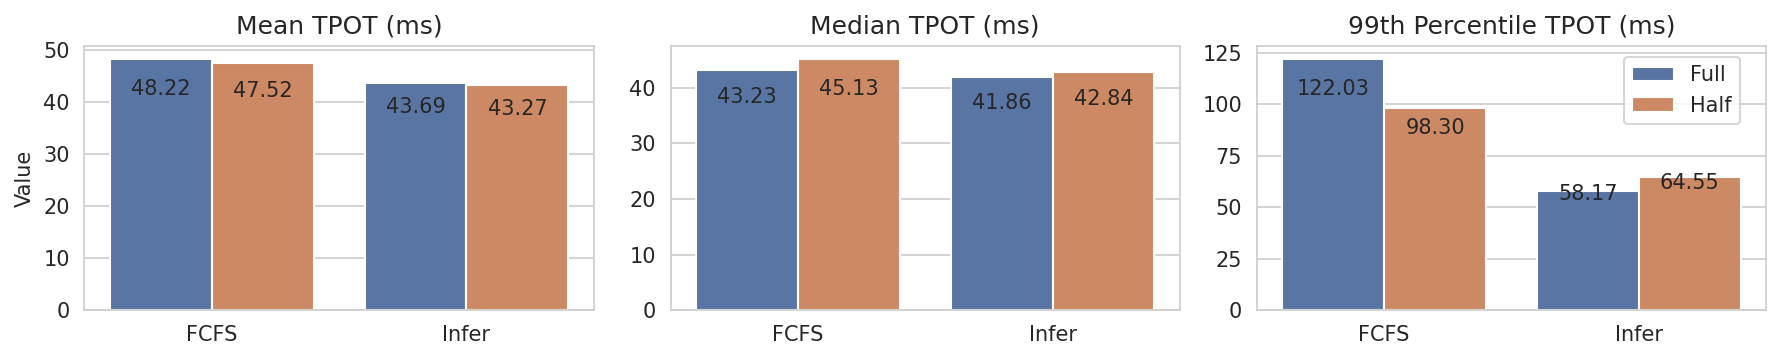

In [141]:
# plot TPOT

# Convert result dictionary to DataFrame
result_df = pd.DataFrame(result)
result_df = result_df.groupby(['scheduler_policy','swap_policy']).mean().reset_index()
# Select ttft-related metrics
tpot_columns = ['mean_tpot_ms', 'median_tpot_ms', 'p99_tpot_ms']
tpot_df = result_df[['scheduler_policy', 'swap_policy'] + tpot_columns]


# Create the DataFrame to long format
tpot_long_df = tpot_df.melt(id_vars=['scheduler_policy', 'swap_policy'], 
                            value_vars=tpot_columns, 
                            var_name='Metric', 
                            value_name='Value')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 2.5), dpi=150, nrows=1, ncols=3)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] =='mean_tpot_ms'], ax=ax[0],legend=False)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] =='median_tpot_ms'], ax=ax[1],legend=False)
sns.barplot(x='scheduler_policy', y='Value', hue='swap_policy', data=tpot_long_df[tpot_long_df['Metric'] == 'p99_tpot_ms'], ax=ax[2])

for i in range(3):
    for p in ax[i].patches:
        if p.get_height() == 0:
            continue
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()*.8), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax[0].set_title('Mean TPOT (ms)')
ax[1].set_title('Median TPOT (ms)')
ax[2].set_title('99th Percentile TPOT (ms)')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

ax[0].set_ylabel('Value')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.legend(bbox_to_anchor=(.7, 1), loc='upper left')
plt.tight_layout()
plt.show()



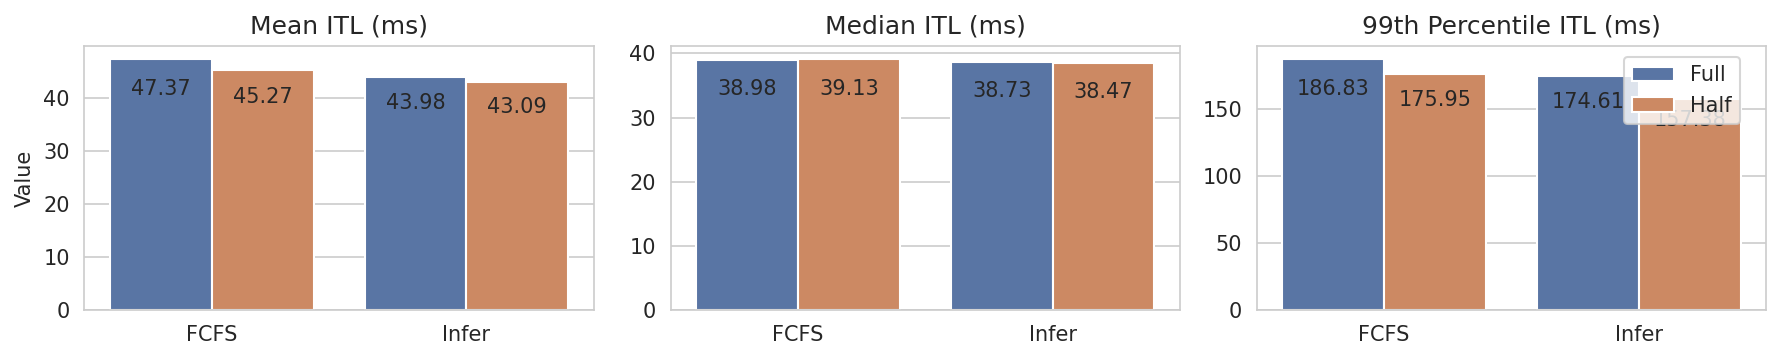

In [142]:
# plot itl

# Convert result dictionary to DataFrame
result_df = pd.DataFrame(result)
# Select itl-related metrics
itl_columns = ["mean_itl_ms", "median_itl_ms", "p99_itl_ms"]
itl_df = result_df[["scheduler_policy", "swap_policy"] + itl_columns]
itl_df = itl_df.groupby(["scheduler_policy", "swap_policy"]).mean().reset_index()

# Create the DataFrame to long format
itl_long_df = itl_df.melt(
    id_vars=["scheduler_policy", "swap_policy"],
    value_vars=itl_columns,
    var_name="Metric",
    value_name="Value",
)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 2.5), dpi=150, nrows=1, ncols=3)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=itl_long_df[itl_long_df["Metric"] == "mean_itl_ms"],
    ax=ax[0],
    legend=False,
)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=itl_long_df[itl_long_df["Metric"] == "median_itl_ms"],
    ax=ax[1],
    legend=False,
)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=itl_long_df[itl_long_df["Metric"] == "p99_itl_ms"],
    ax=ax[2],
)

for i in range(3):
    for p in ax[i].patches:
        if p.get_height() == 0:
            continue
        ax[i].annotate(
            format(p.get_height(), ".2f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height() * 0.8),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

ax[0].set_title("Mean ITL (ms)")
ax[1].set_title("Median ITL (ms)")
ax[2].set_title("99th Percentile ITL (ms)")

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

plt.legend(bbox_to_anchor=(0.7, 1), loc="upper left")
plt.tight_layout()
plt.show()

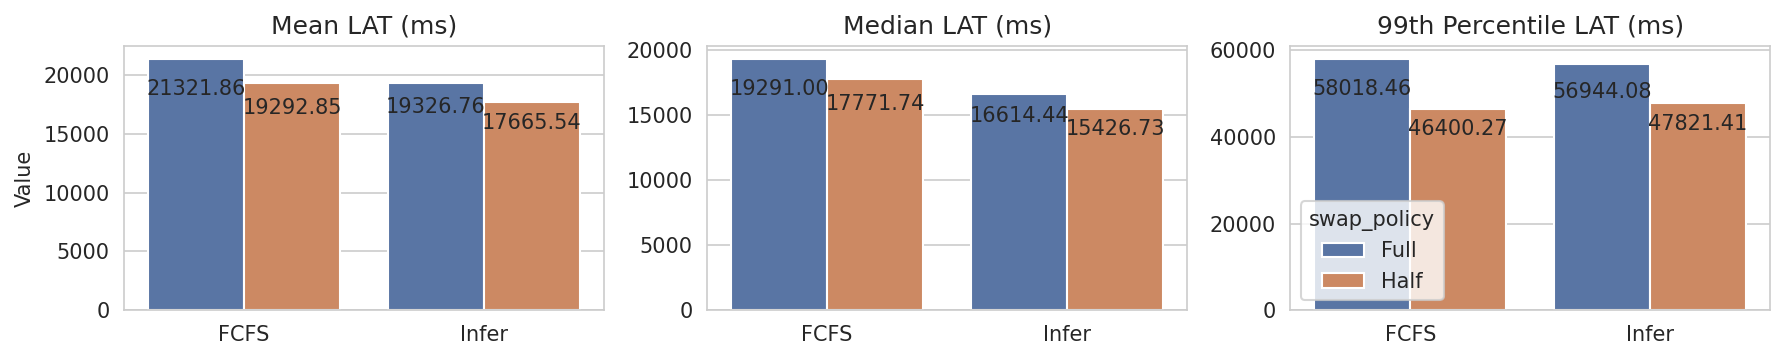

In [143]:
# plot lat

# Convert result dictionary to DataFrame
result_df = pd.DataFrame(result)

# Select ttft-related metrics
lat_columns = ["mean_lat_ms", "median_lat_ms", "p99_lat_ms"]
lat_df = result_df[["scheduler_policy", "swap_policy"] + lat_columns]
lat_df = lat_df.groupby(["scheduler_policy", "swap_policy"]).mean().reset_index()

# Create the DataFrame to long format
lat_long_df = lat_df.melt(
    id_vars=["scheduler_policy", "swap_policy"],
    value_vars=lat_columns,
    var_name="Metric",
    value_name="Value",
)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 2.5), dpi=150, nrows=1, ncols=3)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=lat_long_df[lat_long_df["Metric"] == "mean_lat_ms"],
    ax=ax[0],
    legend=False,
)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=lat_long_df[lat_long_df["Metric"] == "median_lat_ms"],
    ax=ax[1],
    legend=False,
)
sns.barplot(
    x="scheduler_policy",
    y="Value",
    hue="swap_policy",
    data=lat_long_df[lat_long_df["Metric"] == "p99_lat_ms"],
    ax=ax[2],
)

for i in range(3):
    for p in ax[i].patches:
        if p.get_height() == 0:
            continue
        ax[i].annotate(
            format(p.get_height(), ".2f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height() * 0.8),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

ax[0].set_title("Mean LAT (ms)")
ax[1].set_title("Median LAT (ms)")
ax[2].set_title("99th Percentile LAT (ms)")

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

# plt.legend(bbox_to_anchor=(.7, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [144]:
# Initialize result dictionary
result = {"scheduler_policy": [], "swap_policy": []}
selected_columns = ["ttfts", "itls", "latencies"]

for column in selected_columns:
    result[column] = []

# Populate result dictionary with data
for df_name in dfs:
    df = dfs[df_name]
    for column in result:
        if column in df.columns:
            if isinstance(df[column][0], float):
                result[column].append(df[column])
            else:
                result[column].append(df[column][0])

In [145]:
def explode_row(row):
    ttft = row["ttfts"]
    itl = row["itls"]
    latencies = row["latencies"]
    total_length = len(ttft) + len(itl) + len(latencies)

    # 填充列表以确保它们的长度一致
    # 创建一个新的数据框
    new_df = pd.DataFrame(
        {
            "scheduler_policy": [row["scheduler_policy"]] * total_length,
            "swap_policy": [row["swap_policy"]] * total_length,
            "type": ["ttft"] * len(ttft)
            + ["itl"] * len(itl)
            + ["latency"] * len(latencies),
            "value": ttft + itl + latencies,
        }
    )

    return new_df

In [146]:
result_df = pd.DataFrame(result)
result_df["ttfts"] = result_df["ttfts"].apply(lambda x: x.tolist())
result_df["latencies"] = result_df["latencies"].apply(lambda x: x.tolist())
long_df = result_df.apply(
    lambda x: explode_row(x), axis=1, result_type="reduce"
).reset_index(drop=True)
long_df = pd.concat([long_df[i] for i in range(len(long_df))])
long_df["hue"] = long_df["swap_policy"] + " " + long_df["scheduler_policy"]

In [147]:
long_df[long_df['type']=='itl']

,scheduler_policy,swap_policy,type,value,hue
300,FCFS,Half,itl,0.021269,Half FCFS
301,FCFS,Half,itl,0.021227,Half FCFS
302,FCFS,Half,itl,0.021284,Half FCFS
303,FCFS,Half,itl,0.021276,Half FCFS
304,FCFS,Half,itl,0.021164,Half FCFS
...,...,...,...,...,...
630,Infer,Half,itl,0.030082,Half Infer
631,Infer,Half,itl,0.033114,Half Infer
632,Infer,Half,itl,0.033718,Half Infer
633,Infer,Half,itl,0.028619,Half Infer


(0.99, 1.0)

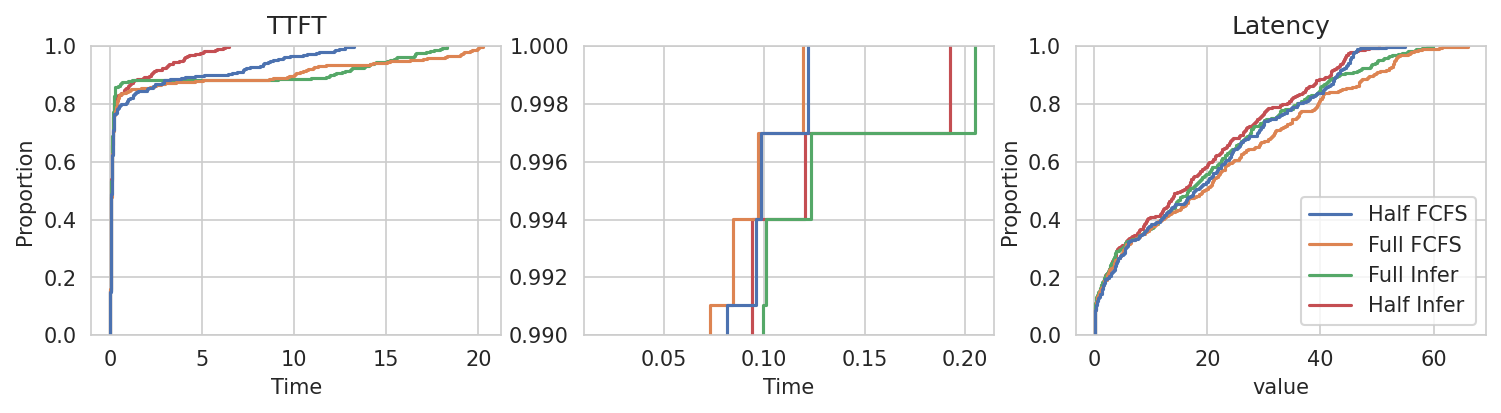

In [148]:
# plot ecdf figures for different scheduler policy and swap policy
colors = sns.color_palette("deep", n_colors=4)
count = 0
fig, ax = plt.subplots(figsize=(12, 2.5), dpi=150, ncols=3, nrows=1)
sns.ecdfplot(
    data=long_df[long_df["type"] == "ttft"],
    x="value",
    hue="hue",
    palette=colors,
    ax=ax[0],
    legend=False,
)
sns.ecdfplot(
    data=long_df[long_df["type"] == "itl"],
    x="value",
    hue="hue",
    palette=colors,
    ax=ax[1],
    legend=False,
)
sns.ecdfplot(
    data=long_df[long_df["type"] == "latency"],
    x="value",
    hue="hue",
    palette=colors,
    ax=ax[2],
)
ax[0].set_title("TTFT")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("")
# ax[1].set_yscale('log')
ax[2].set_title("Latency")
ax[2].get_legend().set_title("")
# ax[0].set_ylim(0.9,1)
ax[1].set_ylim(0.99, 1)

# Generation TP

In [6]:
date = "20240715"
counters = [372]
dir_names= [os.path.join(base_dir, date, str(counter)) for counter in counters]

In [10]:
infer_result = pd.read_csv(os.path.join(dir_names[0], '1000.0qps-Llama-2-13b-chat-hf-094405-infer.csv'))
fcfs_result = pd.read_csv(os.path.join(dir_names[0], '1000.0qps-Llama-2-13b-chat-hf-112028-fcfs.csv'))


In [13]:
infer_result[infer_result['CPU KV cache usage']>0].describe()

,Avg prompt throughput,Avg generation throughput,Running,Swapped,Pending,GPU KV cache usage,CPU KV cache usage,Preemption per iter
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,44.401667,1170.743333,108.383333,12.566667,19.633333,97.993333,10.786667,0.116667
std,241.134151,217.457852,33.754393,9.178764,4.733461,1.178172,6.530566,0.323732
min,0.000000,659.300000,59.000000,1.000000,4.000000,95.100000,0.500000,0.000000
25%,0.000000,1003.600000,81.750000,3.750000,21.000000,97.275000,3.600000,0.000000
50%,0.000000,1194.400000,104.500000,12.000000,21.000000,98.100000,10.300000,0.000000
75%,0.000000,1334.300000,127.750000,19.250000,21.000000,98.700000,17.200000,0.000000
max,1341.300000,1634.100000,182.000000,30.000000,26.000000,100.000000,21.600000,1.000000


In [14]:
fcfs_result[fcfs_result['CPU KV cache usage'] > 0].describe()

,Avg prompt throughput,Avg generation throughput,Running,Swapped,Pending,GPU KV cache usage,CPU KV cache usage,Preemption per iter
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,41.254386,1165.850877,109.017544,13.210526,18.087719,97.719298,10.231579,0.070175
std,159.556684,235.858899,34.226395,7.827919,7.653852,1.342763,6.806566,0.319578
min,0.000000,679.600000,59.000000,2.000000,0.000000,93.500000,0.500000,0.000000
25%,0.000000,968.200000,82.000000,5.000000,21.000000,96.900000,3.500000,0.000000
50%,0.000000,1135.000000,102.000000,13.000000,21.000000,97.600000,10.900000,0.000000
75%,0.000000,1347.800000,134.000000,21.000000,21.000000,98.900000,17.500000,0.000000
max,792.500000,1640.800000,177.000000,27.000000,26.000000,99.900000,21.400000,2.000000
